# Polynomial fitting for $f: h \to \mathcal{C}$

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from scipy import optimize

plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

## Plot $\mathcal{C} = (H, S, V)$

In [2]:
image_path = "jma-scale.png"
image = Image.open(image_path)

if image is None:
    raise ValueError("Image does not exist", image_path)

In [3]:
image_hsv = image.convert('HSV')
width, height = image.size
print(width, height)

55 301


In [4]:
column = 5

if column < 0 or column >= width:
    raise ValueError("Column out of bounds", column)

In [5]:
hsv_values = [image_hsv.getpixel((column, y)) for y in range(height)]

print(hsv_values)

[(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (90, 93, 112), (90, 93, 112), (90, 93, 112), (90, 93, 112), (90, 93, 112), (90, 93, 112), (90, 93, 112), (90, 93, 112), (90, 93, 112), (90, 93, 112), (0, 0, 0), (0, 255, 81), (0, 255, 175), (0, 255, 178), (0, 255, 181), (0, 255, 181), (0, 255, 185), (0, 255, 189), (0, 255, 189), (0, 255, 194), (0, 255, 197), (0, 255, 197), (0, 255, 202), (0, 255, 204), (0, 255, 209), (0, 255, 209), (0, 255, 214), (0, 255, 214), (0, 255, 218), (0, 255, 221), (0, 255, 225), (0, 255, 225), (0, 255, 229), (0, 255, 233), (0, 255, 233), (0, 255, 237), (0, 255, 241), (0, 255, 241), (0, 255, 181), (0, 255, 246), (0, 255, 247), (0, 255, 247), (1, 255, 247), (2, 255, 248), (2, 255, 248), (2, 255, 248), (2, 255, 248), (3, 255, 249), (4, 255, 249), (4, 255, 249), (5, 255, 250), (5, 255, 250), (5, 255, 250), (6, 255, 251), (6, 255, 251), (6, 255, 251), (7, 255, 252), (7, 255, 252), (8, 255, 252), (8, 255, 252), (8, 255, 253), (9, 255, 253

### Plot $f_H, f_S, f_V$ against $r$

In [6]:
r_values = range(height)

h_values = [c[0] for c in hsv_values]
s_values = [c[1] for c in hsv_values]
v_values = [c[2] for c in hsv_values]

for i in range(height):
    print(i, h_values[i], s_values[i], v_values[i])

0 0 0 0
1 0 0 0
2 0 0 0
3 0 0 0
4 0 0 0
5 0 0 0
6 0 0 0
7 90 93 112
8 90 93 112
9 90 93 112
10 90 93 112
11 90 93 112
12 90 93 112
13 90 93 112
14 90 93 112
15 90 93 112
16 90 93 112
17 0 0 0
18 0 255 81
19 0 255 175
20 0 255 178
21 0 255 181
22 0 255 181
23 0 255 185
24 0 255 189
25 0 255 189
26 0 255 194
27 0 255 197
28 0 255 197
29 0 255 202
30 0 255 204
31 0 255 209
32 0 255 209
33 0 255 214
34 0 255 214
35 0 255 218
36 0 255 221
37 0 255 225
38 0 255 225
39 0 255 229
40 0 255 233
41 0 255 233
42 0 255 237
43 0 255 241
44 0 255 241
45 0 255 181
46 0 255 246
47 0 255 247
48 0 255 247
49 1 255 247
50 2 255 248
51 2 255 248
52 2 255 248
53 2 255 248
54 3 255 249
55 4 255 249
56 4 255 249
57 5 255 250
58 5 255 250
59 5 255 250
60 6 255 251
61 6 255 251
62 6 255 251
63 7 255 252
64 7 255 252
65 8 255 252
66 8 255 252
67 8 255 253
68 9 255 253
69 9 255 253
70 10 255 254
71 10 255 254
72 10 255 255
73 11 255 187
74 11 255 255
75 12 255 255
76 12 255 255
77 12 255 255
78 13 255 255
79 14 2

In [7]:
ss = 15
m = 'x'
lw = 0.3

ch = 'turquoise'
cs = 'gold'
cv = 'gray'

lbh = 'Hue $H$'
lbs = 'Saturation $S$'
lbv = 'Value $V$'

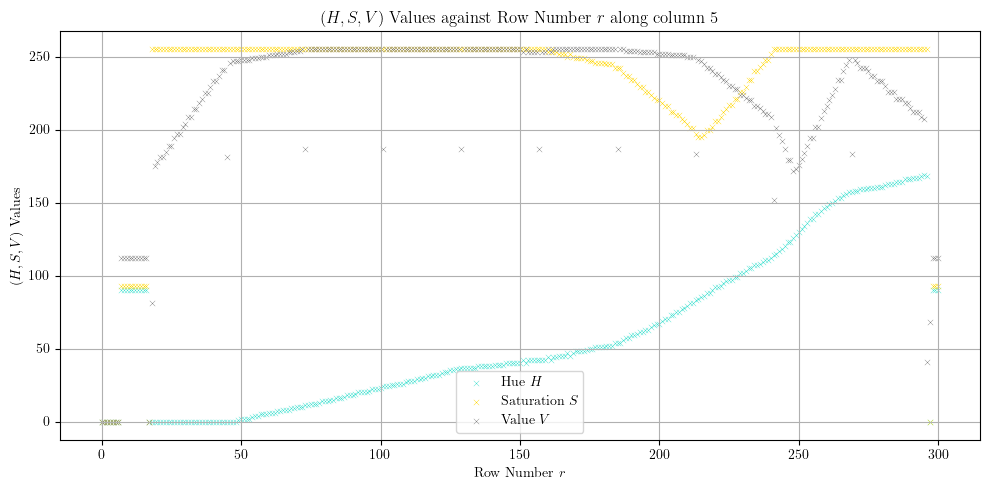

In [8]:
plt.figure(figsize = (10, 5))

plt.scatter(r_values, h_values, label=lbh, color=ch, s=ss, marker=m, linewidths=lw)
plt.scatter(r_values, s_values, label=lbs, color=cs, s=ss, marker=m, linewidths=lw)
plt.scatter(r_values, v_values, label=lbv, color=cv, s=ss, marker=m, linewidths=lw)

plt.xlabel('Row Number $r$')
plt.ylabel('$(H, S, V)$ Values')
plt.title(f'$(H, S, V)$ Values against Row Number $r$ along column {column}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('hsv-against-row.png')

In [9]:
plt.close()

### Plot $f_H, f_S, f_V$ against $h$

In [10]:
hh_values = [(1 - ((r - 18) / 278)) for r in r_values]

hh_values = hh_values[18:297]

hn_values = h_values[18:297]
sn_values = s_values[18:297]
vn_values = v_values[18:297]

for i in range(279):
    print(hh_values[i], hn_values[i], sn_values[i], vn_values[i])

1.0 0 255 81
0.9964028776978417 0 255 175
0.9928057553956835 0 255 178
0.9892086330935251 0 255 181
0.9856115107913669 0 255 181
0.9820143884892086 0 255 185
0.9784172661870504 0 255 189
0.9748201438848921 0 255 189
0.9712230215827338 0 255 194
0.9676258992805755 0 255 197
0.9640287769784173 0 255 197
0.960431654676259 0 255 202
0.9568345323741008 0 255 204
0.9532374100719424 0 255 209
0.9496402877697842 0 255 209
0.9460431654676259 0 255 214
0.9424460431654677 0 255 214
0.9388489208633094 0 255 218
0.935251798561151 0 255 221
0.9316546762589928 0 255 225
0.9280575539568345 0 255 225
0.9244604316546763 0 255 229
0.920863309352518 0 255 233
0.9172661870503597 0 255 233
0.9136690647482014 0 255 237
0.9100719424460432 0 255 241
0.9064748201438849 0 255 241
0.9028776978417266 0 255 181
0.8992805755395683 0 255 246
0.89568345323741 0 255 247
0.8920863309352518 0 255 247
0.8884892086330936 1 255 247
0.8848920863309353 2 255 248
0.8812949640287769 2 255 248
0.8776978417266187 2 255 248
0.8741

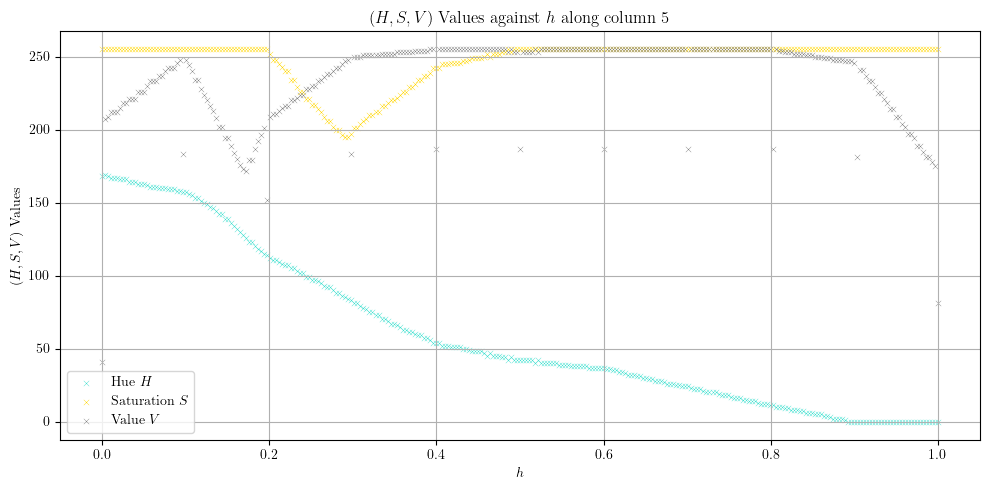

In [11]:
plt.figure(figsize = (10, 5))

plt.scatter(hh_values, hn_values, label=lbh, color=ch, s=ss, marker=m, linewidth=lw)
plt.scatter(hh_values, sn_values, label=lbs, color=cs, s=ss, marker=m, linewidth=lw)
plt.scatter(hh_values, vn_values, label=lbv, color=cv, s=ss, marker=m, linewidth=lw)

plt.xlabel('$h$')
plt.ylabel('$(H, S, V)$ Values')
plt.title(f'$(H, S, V)$ Values against $h$ along column {column}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('hsv-against-h.png')

In [12]:
plt.close()

## Regression

### Prepare Lists to do Regression

In [13]:
hnr_values = [hn_values[i] / 255 * 360 for i in range(279)]
snr_values = [sn_values[i] / 255 * 1 for i in range(279)]
vnr_values = [vn_values[i] / 255 * 1 for i in range(279)]

for i in range(279):
    print(hh_values[i], hnr_values[i], snr_values[i], vnr_values[i])

1.0 0.0 1.0 0.3176470588235294
0.9964028776978417 0.0 1.0 0.6862745098039216
0.9928057553956835 0.0 1.0 0.6980392156862745
0.9892086330935251 0.0 1.0 0.7098039215686275
0.9856115107913669 0.0 1.0 0.7098039215686275
0.9820143884892086 0.0 1.0 0.7254901960784313
0.9784172661870504 0.0 1.0 0.7411764705882353
0.9748201438848921 0.0 1.0 0.7411764705882353
0.9712230215827338 0.0 1.0 0.7607843137254902
0.9676258992805755 0.0 1.0 0.7725490196078432
0.9640287769784173 0.0 1.0 0.7725490196078432
0.960431654676259 0.0 1.0 0.792156862745098
0.9568345323741008 0.0 1.0 0.8
0.9532374100719424 0.0 1.0 0.8196078431372549
0.9496402877697842 0.0 1.0 0.8196078431372549
0.9460431654676259 0.0 1.0 0.8392156862745098
0.9424460431654677 0.0 1.0 0.8392156862745098
0.9388489208633094 0.0 1.0 0.8549019607843137
0.935251798561151 0.0 1.0 0.8666666666666667
0.9316546762589928 0.0 1.0 0.8823529411764706
0.9280575539568345 0.0 1.0 0.8823529411764706
0.9244604316546763 0.0 1.0 0.8980392156862745
0.920863309352518 0.0

### Regression on $f_H$

In [14]:
def f_h_params(xl, y_1, y_2):
    yl = [0 for _ in xl]
    for i, x in enumerate(xl):
        if 0 <= x <= 0.1:
            yl[i] =  -150 * x + 237
        elif 0.1 <= x <= 0.6:
            yl[i] = (
                ((222  * (x - 0.3) * (x - 0.4) * (x - 0.6)) / ((0.1 - 0.3) * (0.1 - 0.4) * (0.1 - 0.6))) +
                ((y_1 * (x - 0.1) * (x - 0.4) * (x - 0.6)) / ((0.3 - 0.1) * (0.3 - 0.4) * (0.3 - 0.6))) +
                ((y_2 * (x - 0.1) * (x - 0.3) * (x - 0.6)) / ((0.4 - 0.1) * (0.4 - 0.3) * (0.4 - 0.6))) +
                ((51   * (x - 0.1) * (x - 0.3) * (x - 0.4)) / ((0.6 - 0.1) * (0.6 - 0.3) * (0.6 - 0.4)))
            )
        elif 0.6 <= x <= 0.9:
            yl[i] = -170 * x + 153
        elif 0.9 <= x <= 1:
            yl[i] = 0
        else:
            yl[i] = 0
    return yl

In [15]:
h_init = [0, 0]

h_params, _ = optimize.curve_fit(f_h_params, hh_values, hnr_values, p0=h_init)

print(h_params)

[114.81579939  79.53254095]


In [74]:
def f_h(x):
    return f_h_params(x, *h_params)

hp_values = [i / 1000 for i in range(0, 1001, 1)]
l_h = f_h(hp_values)

In [75]:
lw = 1

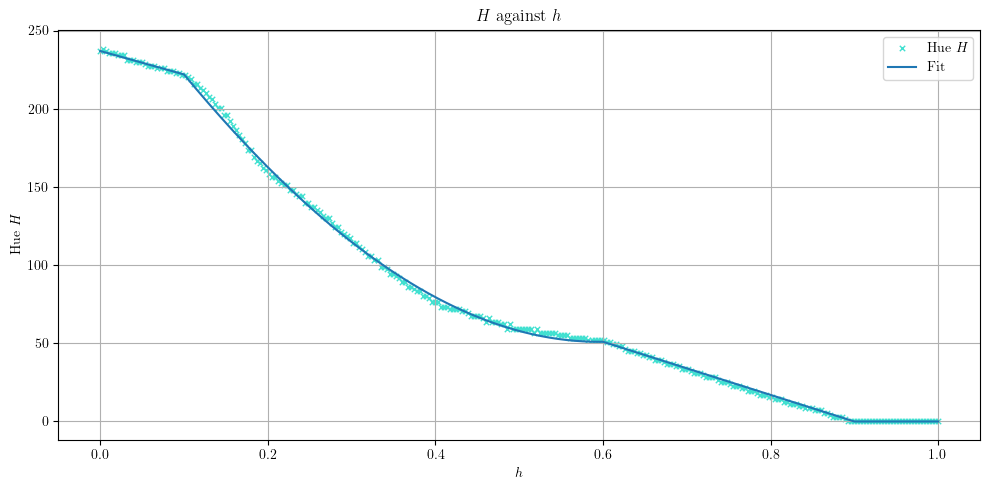

In [76]:
plt.figure(figsize = (10, 5))

plt.scatter(hh_values, hnr_values, label=lbh, color=ch, s=ss, marker=m, linewidth=lw)
plt.plot(hp_values, l_h, label='Fit')

plt.xlabel('$h$')
plt.ylabel(lbh)
plt.title('$H$ against $h$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('h-against-h.png')

In [77]:
plt.close()

### Regression on $f_S$

In [78]:
def f_s(xl):
    yl = [0 for _ in xl]
    for i, x in enumerate(xl):
        if 0 <= x <= 0.2:
            yl[i] = 1
        elif 0.2 <= x <= 0.29:
            yl[i] = -2.611 * x + 1.522
        elif 0.29 <= x <= 0.4:
            yl[i] = 1.682 * x + 0.277
        elif 0.4 <= x <= 0.5:
            yl[i] = 0.5 * x + 0.75
        elif 0.5 <= x <= 1:
            yl[i] = 1
        else:
            yl[i] = 0
    return yl

l_s = f_s(hp_values)

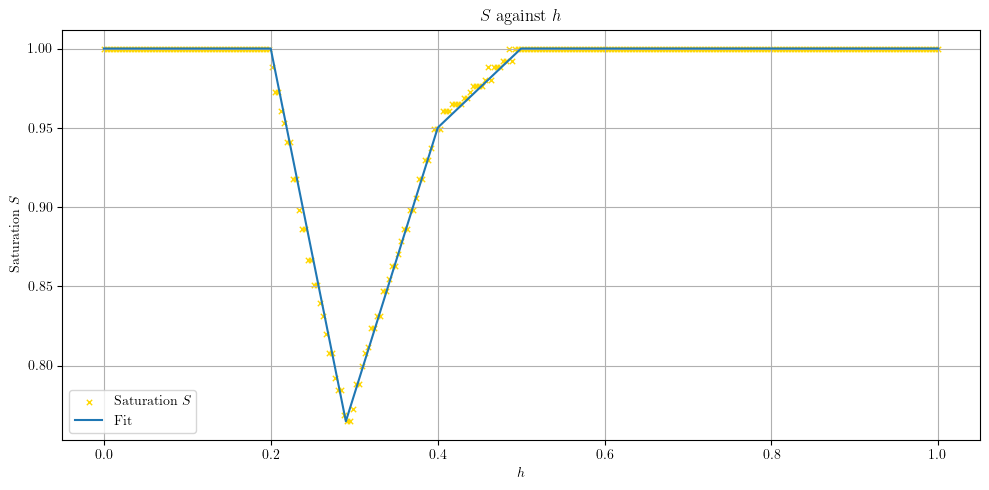

In [79]:
plt.figure(figsize = (10, 5))

plt.scatter(hh_values, snr_values, label=lbs, color=cs, s=ss, marker=m, linewidth=lw)
plt.plot(hp_values, l_s, label='Fit')

plt.xlabel('$h$')
plt.ylabel(lbs)
plt.title('$S$ against $h$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('s-against-h.png')

### Regression on $f_V$

In [80]:
def f_v(xl):
    yl = [0 for _ in xl]
    for i, x in enumerate(xl):
        if 0 <= x <= 0.1:
            yl[i] = 1.8 * x + 0.8
        elif 0.1 <= x <= 0.172:
            yl[i] = -4.4 * x + 1.42
        elif 0.172 <= x <= 0.2:
            yl[i] = 6.8 * x - 0.54
        elif 0.2 <= x <= 0.3:
            yl[i] = 1.6 * x + 0.5
        elif 0.3 <= x <= 0.4:
            yl[i] = 0.2 * x + 0.92
        elif 0.4 <= x <= 0.8:
            yl[i] = 1
        elif 0.8 <= x <= 0.9:
            yl[i] = -0.3 * x + 1.24
        elif 0.9 <= x <= 1:
            yl[i] = -2.9 * x + 3.58
        else:
            yl[i] = 0
    return yl

l_v = f_v(hp_values)

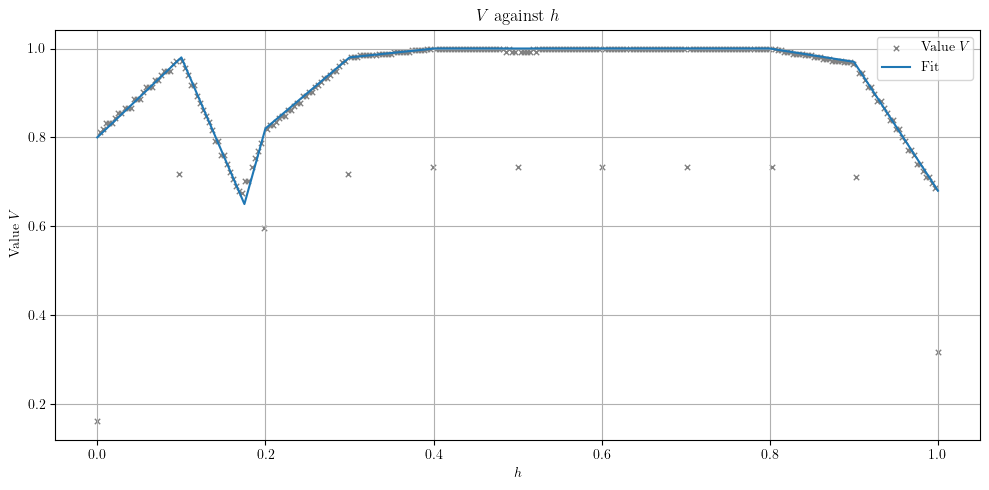

In [81]:
plt.figure(figsize = (10, 5))

plt.scatter(hh_values, vnr_values, label=lbv, color=cv, s=ss, marker=m, linewidth=lw)
plt.plot(hp_values, l_v, label='Fit')

plt.xlabel('$h$')
plt.ylabel(lbv)
plt.title('$V$ against $h$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('v-against-h.png')